In [233]:
import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib.pyplot as plt

# 1. Fighter Data

In [64]:
fighter_df = pd.read_csv("ufc_scrape/data_fighters.csv")

In [65]:
fighter_df.head()

,name,record,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg
0,\n Hunter Azure\n\n,\n Record: 8-0-0\n,"\n ,\n 5' 8""\n","\n ,\n 135 lbs.\n","\n ,\n 69""\n","\n ,\n Orthodox\n","\n ,\n \n Mar 02, 1992\n ...","\n ,\n\n 4.00\n\n","\n ,\n 50%\n","\n ,\n 1.57\n","\n ,\n 56%\n","\n ,\n 2.00\n","\n ,\n 33%\n","\n ,\n 75%\n","\n ,\n 2.5\n"
1,\n Michael Byrnes\n\n,\n Record: 5-2-0\n,"\n ,\n 5' 11""\n","\n ,\n 155 lbs.\n","\n ,\n --\n","\n ,\n \n","\n ,\n \n Jul 17, 1990\n ...","\n ,\n\n 0.00\n\n","\n ,\n 0%\n","\n ,\n 0.00\n","\n ,\n 0%\n","\n ,\n 0.00\n","\n ,\n 0%\n","\n ,\n 0%\n","\n ,\n 0.0\n"
2,\n Gleidson Cutis\n\n,\n Record: 7-3-0\n,"\n ,\n 5' 9""\n","\n ,\n 155 lbs.\n","\n ,\n --\n","\n ,\n Orthodox\n","\n ,\n \n Feb 07, 1989\n ...","\n ,\n\n 2.99\n\n","\n ,\n 52%\n","\n ,\n 8.28\n","\n ,\n 59%\n","\n ,\n 0.00\n","\n ,\n 0%\n","\n ,\n 0%\n","\n ,\n 0.0\n"
3,\n Rolando Dy\n\n,\n Record: 9-7-1 (1 NC)\n ...,"\n ,\n 5' 8""\n","\n ,\n 145 lbs.\n","\n ,\n 69""\n","\n ,\n Orthodox\n","\n ,\n \n Aug 11, 1990\n ...","\n ,\n\n 3.04\n\n","\n ,\n 37%\n","\n ,\n 4.47\n","\n ,\n 52%\n","\n ,\n 0.30\n","\n ,\n 20%\n","\n ,\n 68%\n","\n ,\n 0.0\n"
4,\n Jessica Eye\n\n,\n Record: 15-7-0 (1 NC)\n ...,"\n ,\n 5' 6""\n","\n ,\n 125 lbs.\n","\n ,\n 66""\n","\n ,\n Orthodox\n","\n ,\n \n Jul 27, 1986\n ...","\n ,\n\n 3.79\n\n","\n ,\n 38%\n","\n ,\n 3.39\n","\n ,\n 59%\n","\n ,\n 0.46\n","\n ,\n 45%\n","\n ,\n 59%\n","\n ,\n 0.7\n"


In [66]:
fighter_df.duplicated(subset=None).sum()

0

In [67]:
fighter_df = fighter_df.replace(['\n',','],'', regex=True)

In [68]:
fighter_df = fighter_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [69]:
percentage_columns = ['str_acc','str_def','td_acc','td_def']
for column in percentage_columns:
    fighter_df[column] = fighter_df[column].str.replace('%','.0').astype(float)/100

In [70]:
fighter_df['record'] = fighter_df['record'].str.replace('Record: ','', regex=True)

In [71]:
fighter_df[['wins','losses','draws']] = fighter_df['record'].str.split('-', expand=True)
fighter_df['draws'] = fighter_df['draws'].str.split(' ').str[0]
fighter_df.drop(columns=['record'], inplace=True)

In [72]:
fighter_df['weight'] = fighter_df['weight'].str.replace(' lbs.', '', regex=True)

In [73]:
fighter_df['reach'] = fighter_df['reach'].str.replace('"', '', regex=True)

In [74]:
now = pd.Timestamp('now')
fighter_df['dob'] = pd.to_datetime(fighter_df['dob'], format='%b %d %Y', errors='coerce')
fighter_df['dob'] = fighter_df['dob'].where(fighter_df['dob'] < now, fighter_df['dob'] -  np.timedelta64(100, 'Y'))
fighter_df['age'] = (now - fighter_df['dob']).astype('<m8[Y]')

In [75]:
fighter_df['height'] = fighter_df['height'].replace([' ','"'],'', regex=True)
fighter_df[['feet','inches']] = fighter_df['height'].str.split("'", expand=True)
fighter_df['feet'] = fighter_df['feet'].replace('--','', regex=True)

fighter_df['feet'] = pd.to_numeric(fighter_df['feet'])
fighter_df['inches'] = pd.to_numeric(fighter_df['inches'])

fighter_df['height'] = round((fighter_df['feet']*0.3048) + (fighter_df['inches']*0.0254), 2)

fighter_df.drop(columns=['feet','inches'], inplace=True)

In [76]:
fighter_df['reach'] = fighter_df['reach'].replace('--','', regex=True)
fighter_df['reach'] = pd.to_numeric(fighter_df['reach'])
fighter_df['reach'] = round(fighter_df['reach']*0.0254, 2)

In [78]:
fighter_df.head()

,name,height,weight,reach,stance,dob,slmp,str_acc,ssapm,str_def,td_avg,td_acc,td_def,sub_avg,wins,losses,draws,age
0,Hunter Azure,1.73,135,1.75,Orthodox,1992-03-02,4.00,0.50,1.57,0.56,2.00,0.33,0.75,2.5,8,0,0,28.0
1,Michael Byrnes,1.80,155,NaN,,1990-07-17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5,2,0,29.0
2,Gleidson Cutis,1.75,155,NaN,Orthodox,1989-02-07,2.99,0.52,8.28,0.59,0.00,0.00,0.00,0.0,7,3,0,31.0
3,Rolando Dy,1.73,145,1.75,Orthodox,1990-08-11,3.04,0.37,4.47,0.52,0.30,0.20,0.68,0.0,9,7,1,29.0
4,Jessica Eye,1.68,125,1.68,Orthodox,1986-07-27,3.79,0.38,3.39,0.59,0.46,0.45,0.59,0.7,15,7,0,33.0


In [91]:
fighter_df.isnull().sum()

name         0
height     258
weight       0
reach      257
stance       0
dob        740
slmp         0
str_acc      0
ssapm        0
str_def      0
td_avg       0
td_acc       0
td_def       0
sub_avg      0
wins         0
losses       0
draws        0
age        740
dtype: int64

In [83]:
reach_df = fighter_df.dropna(subset=['reach'])

In [86]:
round(reach_df['height'].sum(),1)

3022.9

In [87]:
round(reach_df['reach'].sum(),1)

3096.8

In [90]:
fighter_df['reach'].fillna(fighter_df['height'], inplace=True)

In [89]:
fighter_df['weight'].value_counts()

170    529
155    511
185    424
145    355
135    338
      ... 
430      1
232      1
285      1
320      1
259      1
Name: weight, Length: 112, dtype: int64

In [ ]:
age_grouped_df = fighter_df.groupby('')

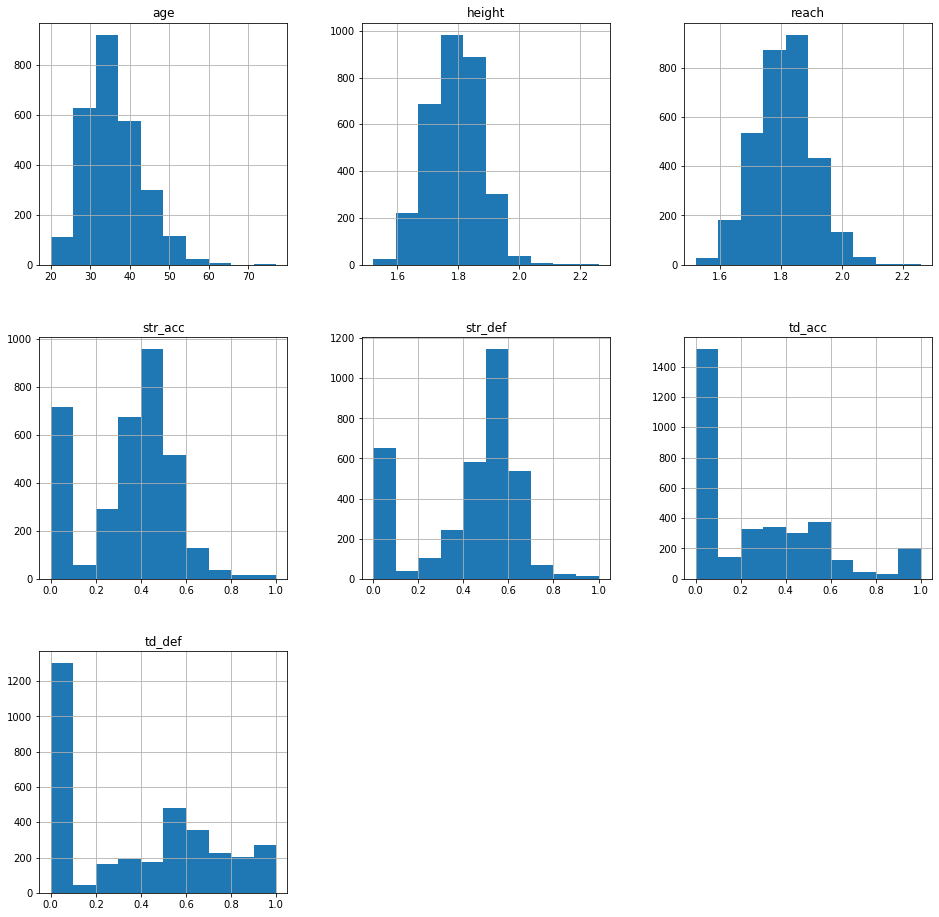

In [243]:
fighter_df.hist(bins=10, figsize=(16,16))
plt.show()

# 2. Bout Data

In [218]:
bout_df = pd.read_csv("ufc_scrape/data_fights.csv")

In [219]:
bout_df.head()

,f1_name,f2_name,f1_str,f2_str,f1_tds,f2_tds,f1_subs,f2_subs,f1_pass,f2_pass,weight_class,method,finisher,round_num,time,event_name,event_date
0,\n Anthony Smith\n,\n Alexander Gustafsson\n ...,49,72,0,1,1,0,1,1,\n Light Heavyweight,\n \n \n\n SUB\n\n,\n Rear Naked Choke\n,4,\n\n \n 2:38\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
1,\n Aleksandar Rakic\n,\n Jimi Manuwa\n,2,2,0,0,0,0,0,0,\n Light Heavyweight,\n \n \n\n KO/TKO\n\n,\n Kick\n,1,\n\n \n 0:47\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
2,\n Makwan Amirkhani\n,\n Chris Fishgold\n,9,16,1,0,1,0,2,0,\n Featherweight,\n \n \n\n SUB\n\n,\n Anaconda Choke\n,2,\n\n \n 4:25\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
3,\n Christos Giagos\n,\n Damir Hadzovic\n,47,24,6,1,0,0,3,0,\n Lightweight,\n \n \n\n U-DEC\n\n,\n \n,3,\n\n \n 5:00\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
4,\n Daniel Teymur\n,\n Sung Bin Jo\n,40,21,1,1,0,1,0,0,\n Featherweight,\n \n \n\n U-DEC\n\n,\n \n,3,\n\n \n 5:00\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"


In [220]:
bout_df.duplicated(subset=None).sum()

0

In [221]:
bout_df = bout_df.replace(['\n',','],'', regex=True)

In [222]:
bout_df = bout_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [223]:
bout_df[['minutes', 'seconds']] = bout_df['time'].str.split(':', expand=True)

In [224]:
num_columns = ['f1_str', 
               'f2_str', 
               'f1_tds', 
               'f2_tds', 
               'f1_subs', 
               'f2_subs', 
               'f1_pass', 
               'f2_pass',
               'round_num',
               'minutes',
               'seconds']

In [225]:
bout_df[num_columns] = bout_df[num_columns].apply(pd.to_numeric, errors='coerce')

In [226]:
bout_df['fight_time'] = round((5*(bout_df['round_num']-1)) + bout_df['minutes'] + (bout_df['seconds']/60), 2)

In [227]:
bout_df.drop(columns=['round_num','time','minutes','seconds'], inplace=True)

In [229]:
bout_df['event_date'] = pd.to_datetime(bout_df['event_date'], format='%B %d %Y')

In [230]:
bout_df.head()

,f1_name,f2_name,f1_str,f2_str,f1_tds,f2_tds,f1_subs,f2_subs,f1_pass,f2_pass,weight_class,method,finisher,event_name,event_date,fight_time
0,Anthony Smith,Alexander Gustafsson,49,72,0,1,1,0,1,1,Light Heavyweight,SUB,Rear Naked Choke,UFC Fight Night: Gustafsson vs. Smith,2019-06-01,17.63
1,Aleksandar Rakic,Jimi Manuwa,2,2,0,0,0,0,0,0,Light Heavyweight,KO/TKO,Kick,UFC Fight Night: Gustafsson vs. Smith,2019-06-01,0.78
2,Makwan Amirkhani,Chris Fishgold,9,16,1,0,1,0,2,0,Featherweight,SUB,Anaconda Choke,UFC Fight Night: Gustafsson vs. Smith,2019-06-01,9.42
3,Christos Giagos,Damir Hadzovic,47,24,6,1,0,0,3,0,Lightweight,U-DEC,,UFC Fight Night: Gustafsson vs. Smith,2019-06-01,15.00
4,Daniel Teymur,Sung Bin Jo,40,21,1,1,0,1,0,0,Featherweight,U-DEC,,UFC Fight Night: Gustafsson vs. Smith,2019-06-01,15.00


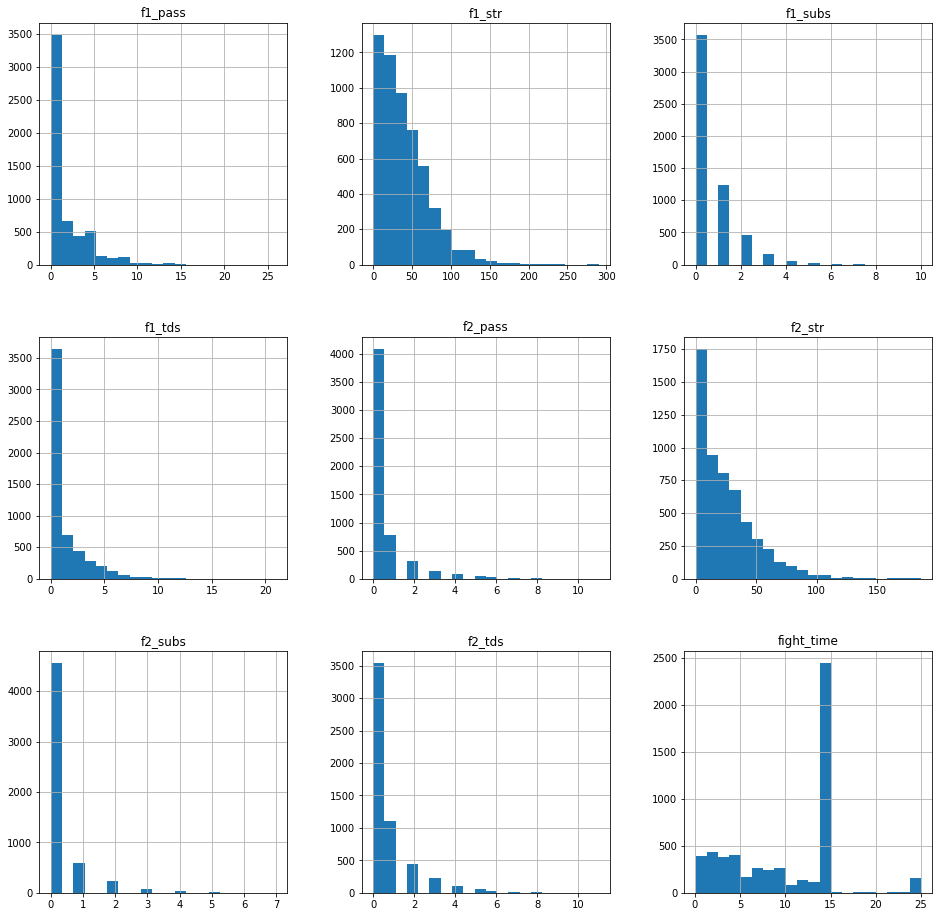

In [245]:
bout_df.hist(bins=20, figsize=(16,16))
plt.show()